In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
pl_players = pd.read_csv('./data/premier_league_data_fb_ref.csv')
bundesliga_players = pd.read_csv('./data/bundesliga_data_fb_ref.csv')
la_liga_players = pd.read_csv('./data/la_liga_data_fb_ref.csv')
ligue_1_players = pd.read_csv('./data/ligue_1_data_fb_ref.csv')
serie_a_players = pd.read_csv('./data/serie_a_data_fb_ref.csv')

# Diversity of Each league across Seasons


In [3]:
pl_players['Season'].unique()

array(['2017-2018', '2018-2019', '2019-2020', '2020-2021', '2021-2022'],
      dtype=object)

In [15]:
pl_season_data = pl_players.groupby(['Season'])
pl_season_diversity = pl_season_data['Nation'].nunique().to_dict()


bundesliga_season_data = bundesliga_players.groupby(['Season'])
bundesliga_season_diversity = bundesliga_season_data['Nation'].nunique().to_dict()


la_liga_season_data = la_liga_players.groupby(['Season'])
la_liga_season_diversity = la_liga_season_data['Nation'].nunique().to_dict()


ligue_1_season_data = ligue_1_players.groupby(['Season'])
ligue_1_season_diversity = ligue_1_season_data['Nation'].nunique().to_dict()


serie_a_season_data = serie_a_players.groupby(['Season'])
serie_a_season_diversity = serie_a_season_data['Nation'].nunique().to_dict()


## Plot the diversity values : Season vs Diversity (# of Nations)

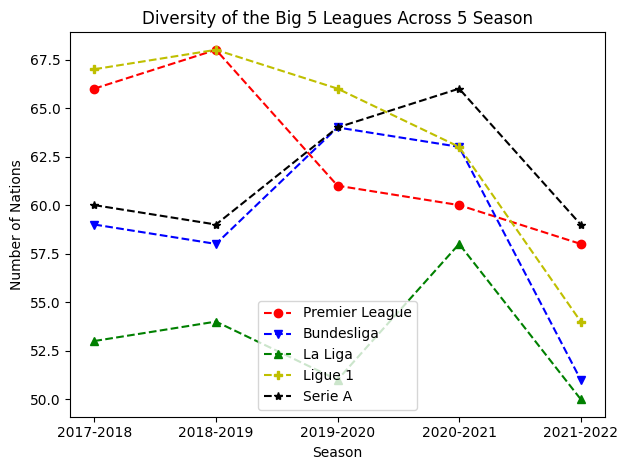

<Figure size 640x480 with 0 Axes>

In [23]:
seasons = ['2017-2018', '2018-2019', '2019-2020', '2020-2021', '2021-2022']
plt.plot(seasons, pl_season_diversity.values(), 'ro', linestyle='dashed', label='Premier League')
plt.plot(seasons, bundesliga_season_diversity.values(), 'bv', linestyle='dashed', label='Bundesliga')
plt.plot(seasons, la_liga_season_diversity.values(), 'g^', linestyle='dashed', label='La Liga')
plt.plot(seasons, ligue_1_season_diversity.values(), 'yP', linestyle='dashed', label='Ligue 1')
plt.plot(seasons, serie_a_season_diversity.values(), 'k*', linestyle='dashed', label='Serie A')
plt.legend()
plt.xlabel('Season')
plt.ylabel('Number of Nations')
plt.title('Diversity of the Big 5 Leagues Across {0} Season'.format(len(seasons)))
plt.tight_layout()
plt.show()
plt.savefig('./figures/big5_season_diversity.png')

do an analysis of how each league fairs across seasons and if you find something interesting dive into that season:
## League Nations:
- Premier League : England 
- bundesliga : Germany
- La Liga : Spain
- Ligue 1 : France
- Serie A : Italy 

## some factors to considered :
- money being spent : if there is a decrease then we can look into which years : COVID, Brexit (premier league spending)
- where are the players coming from 
- attacking stats of the league : mean xG 
- clubs for each league = unique values from each csv file
- transfer_data = you can assign from which league was a players transfered from 